<a href="https://colab.research.google.com/github/Hanamoongit/Hanamoongit/blob/main/google_colab_notebooks/Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse von Hausdaten
### Google Colab Example
#### hier sollen verschiedene Merkmale der Häuser untersucht und  Abhängigkeiten dargestellt werden

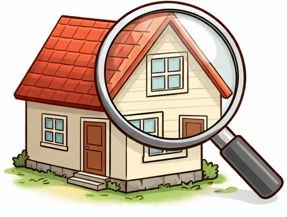

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Delimiter: ','
Erfolgreich mit UTF-8 eingelesen
['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


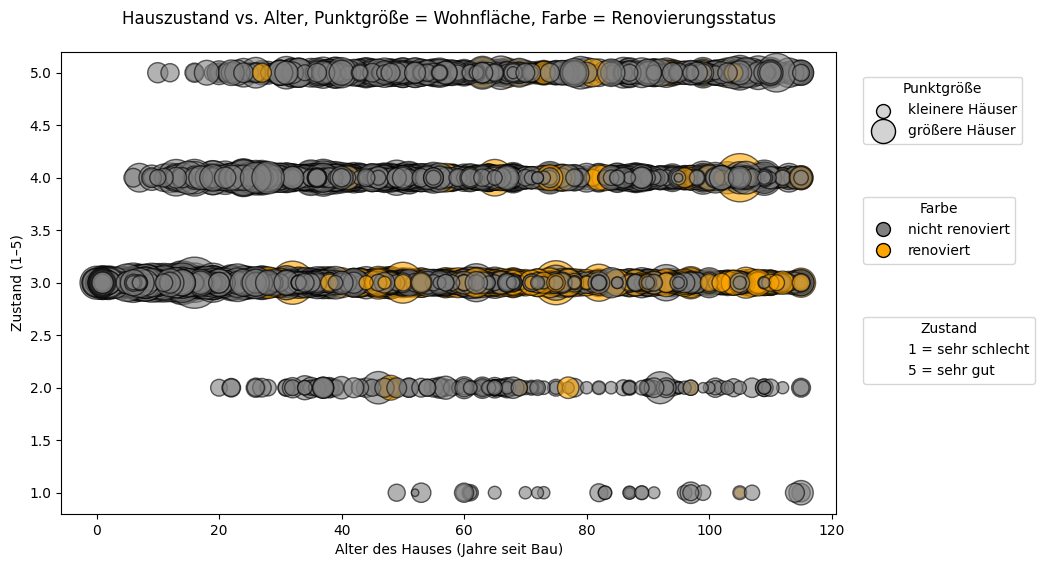

-----------------------------
--- Hauszustand vs. Alter ---
-----------------------------


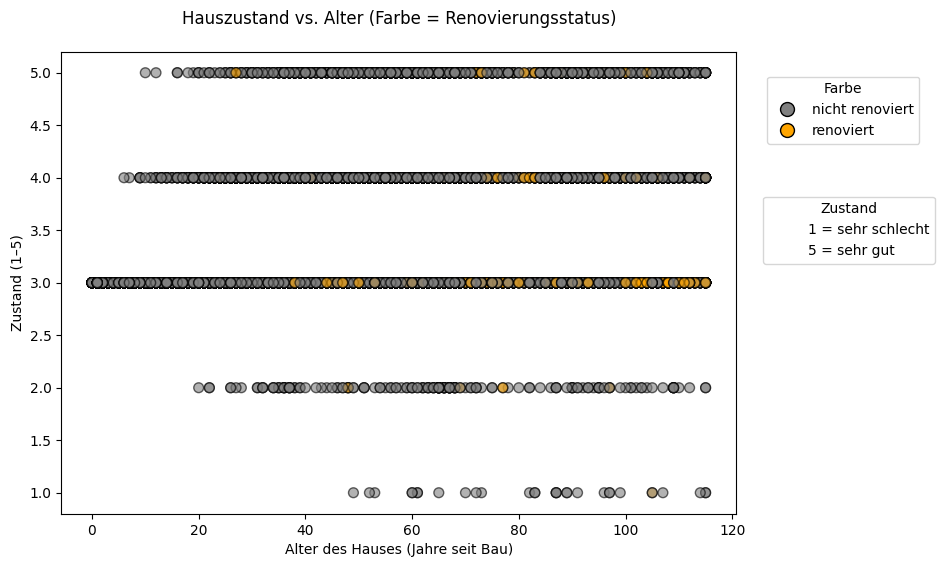

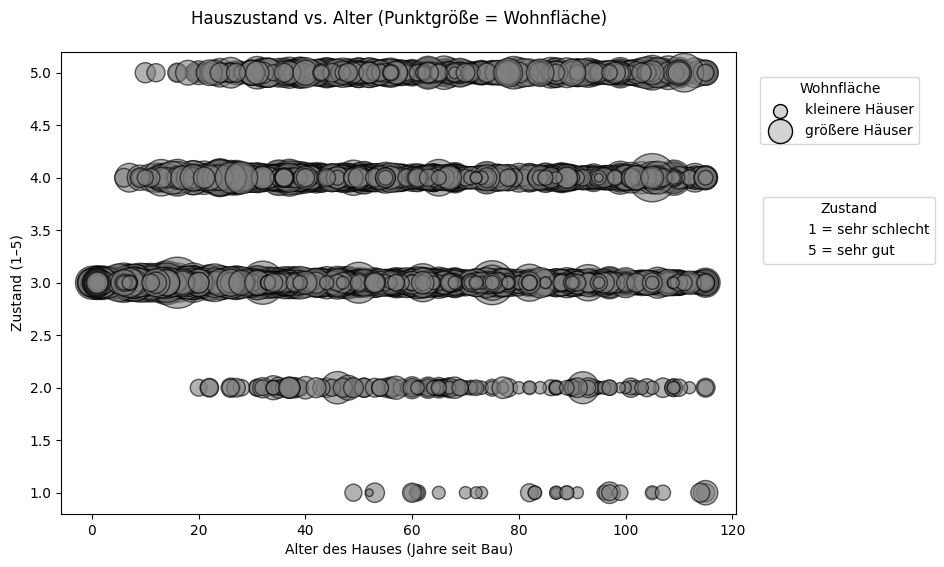

In [2]:

#-------------------------------------------------------------------
# Bibliotheken importieren und SparkSession starten
#-------------------------------------------------------------------
import csv

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # ← hier importieren

#-------------------------------------------------------------------
# 1. Einlesen und Vorverarbeitung der CSV
# 1.1 Trennzeichen ermitteln mit csv.Sniffer
#-------------------------------------------------------------------
#------------------------------------------------
# Roh-Datei laden (als Text) und Header entfernen
#------------------------------------------------

from google.colab import drive
drive.mount('/content/drive')

#------------------------------------------------
# Pfad zu meiner CSV in Drive
#------------------------------------------------
file_path = '/content/drive/MyDrive/BDS Bibliotheken/Isas Housing//Housing.csv'

#------------------------------------------------
# Sample einlesen
#------------------------------------------------
with open(file_path, 'rb') as f:
    raw = f.read(2048)
    sample = raw.decode('utf-8', errors='ignore')

#------------------------------------------------
# Sniffer verwenden
#------------------------------------------------
sep = csv.Sniffer().sniff(sample).delimiter

print("Delimiter:", repr(sep))

#-------------------------------------------------------------------
# 1.2 Einlesen mit Fallback von UTF-8 auf Latin-1
#-------------------------------------------------------------------
try:
    df = pd.read_csv(file_path, sep=sep, encoding='utf-8')
    print("Erfolgreich mit UTF-8 eingelesen")
except UnicodeDecodeError:
    df = pd.read_csv(file_path, sep=sep, encoding='latin1')
    print("UTF-8 schlägt fehl, Eingabe mit latin1")

#-------------------------------------------------------------------
# 1.3 Umlautkorrektur (falls nötig)
# Oft reicht schon encoding='utf-8' und Pandas repariert automatisch.
# Falls in Textspalten falsche Zeichen stehen, kann ich sie gezielt ersetzen:
#-------------------------------------------------------------------

for col in df.select_dtypes(include='object'):
    df[col] = (df[col]
               .str.replace('Ã¤','ä')
               .str.replace('Ã¶','ö')
               .str.replace('Ã¼','ü')
               .str.replace('ÃŸ','ß'))

#-------------------------------------------------------------------
# 1.4 Kopfzeilen und erste 20 Zeilen anzeigen
#-------------------------------------------------------------------
# Spaltennamen
print(df.columns.tolist())

# Erste 20 Zeilen
df.head(20)

#-------------------------------------------------------------------
# matplotlib.pyplot : Hauszustand vs. Alter
#-------------------------------------------------------------------
df['age'] = 2015 - df['yr_built']
df['renovated'] = df['yr_renovated'] > 0

#---

fig, ax = plt.subplots(figsize=(10, 6))

# Scatter
sc = ax.scatter(
    df['age'],
    df['condition'],
    s=df['sqft_living'] / 10,
    c=df['renovated'].map({False: 'gray', True: 'orange'}),
    alpha=0.6,
    edgecolor='k'
)

ax.set_xlabel('Alter des Hauses (Jahre seit Bau)')
ax.set_ylabel('Zustand (1–5)')
ax.set_title(
    'Hauszustand vs. Alter, Punktgröße = Wohnfläche, Farbe = Renovierungsstatus',
    pad=20   # Abstand in Punkten zwischen Grafik und Überschrift
)

#------------------------------------------------
# Erste Legende:
# Punktgröße - Legende rechts außerhalb
#------------------------------------------------
# Dummy-Handles für Punktgrößen
size_handles = [
    ax.scatter([], [], s=1000/10, color='lightgray', edgecolor='k'),
    ax.scatter([], [], s=3000/10, color='lightgray', edgecolor='k')
]
size_labels = ['kleinere Häuser', 'größere Häuser']

#--------------------------
# wenn ich mit ax arbeite, kann ich zwei Legenden anzeigen lassen
# mit nur einem ax.legend (leg1)
# wenn ich eine dritte Legende anlege und sonst nichts ändere
# wird die erste Legende angelegt und die zweite verschwindet,
# damit die dritte angezeigt werden kann
# wenn ich aber für jede Legende ein eigenes ax.legend (leg...) anlege
# werden zwar alle drei Legenden angelegt,
# aber nach rechts in den nicht mehr sichtbaren Bereich verschoben
#--------------------------
# Lösung für ax wäre
# leg = ax.legend(
#    handles, labels,
#    loc="upper left",
#    bbox_to_anchor=(1.02, 0.7),
#    bbox_transform=fig.transFigure,  # <—
#    borderaxespad=0
#)
#-------------------------
# mit fig geht es auch
#-------------------------

fig.legend(
#leg1 = ax.legend(
    size_handles, size_labels,
    title='Punktgröße',
    loc='upper left',
    bbox_to_anchor=(0.92, 0.85),
   #bbox_to_anchor=(1.02, 1),
    borderaxespad=0.5
   #borderaxespad=0
)
#ax.add_artist(leg1)

#------------------------------------------------
# Zweite Legende:
# Farbe - Legende rechts außerhalb
#------------------------------------------------

# Dummy-Handles für Farben
color_handles = [
    Line2D([0], [0], marker='o', color='w', label='nicht renoviert',
           markerfacecolor='gray', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='renoviert',
           markerfacecolor='orange', markersize=10, markeredgecolor='k')
]

fig.legend(
#leg2 = ax.legend(
    handles=color_handles,
    title='Farbe',
    loc='upper left',
    bbox_to_anchor=(0.92, 0.65),
   #bbox_to_anchor=(1.02, 0.7),
    bbox_transform=fig.transFigure,
    borderaxespad=0.5
   #borderaxespad=0
)
#ax.add_artist(leg2)

#------------------------------------------------
# Dritte Legende:
# Zustand - Legende rechts außerhalb
#------------------------------------------------
zustand_handles = [
    Line2D([0], [0], linestyle='none', label='1 = sehr schlecht'),
    Line2D([0], [0], linestyle='none', label='5 = sehr gut')
]

fig.legend(
#leg3 = ax.legend(
    zustand_handles,
    ['1 = sehr schlecht', '5 = sehr gut'],
    title='Zustand',
    loc='upper left',
    bbox_to_anchor=(0.92, 0.45),
   #bbox_to_anchor=(1.02, 0.4),  # etwas weiter unten platzieren
    borderaxespad=0.5
   #borderaxespad=0
)

#ax.add_artist(leg3)

#ax.add_artist(leg1) #für 2 Legenden

# Platz rechts fürs Ganze schaffen
#plt.subplots_adjust(right=0.75)

plt.show()

print("-----------------------------")
print("--- Hauszustand vs. Alter ---")
print("-----------------------------")

# 2. Plot-Funktion
def plot_age_vs_condition(df, size_col=None, color_col=None,
                          size_legend=None, color_legend=None,
                          title=""):
    fig, ax = plt.subplots(figsize=(10, 6))
    # Farbe festlegen oder mapen
    if color_col is None:
        colors = 'gray'
    else:
        colors = df[color_col].map({False: 'gray', True: 'orange'})
    # Punktgröße festlegen oder nach Spalte
    if size_col is None:
        sizes = 50
    else:
        sizes = df[size_col] / 10

    sc = ax.scatter(df['age'], df['condition'],
                    c=colors, s=sizes,
                    alpha=0.6, edgecolor='k')

    ax.set_xlabel('Alter des Hauses (Jahre seit Bau)')
    ax.set_ylabel('Zustand (1–5)')
    ax.set_title(title, pad=20)

    # Legende(n) hinzufügen
    if color_col:
        fig.legend(
            [Line2D([0], [0], marker='o', color='w', label=l,
                    markerfacecolor=c, markersize=10, markeredgecolor='k')
             for l, c in color_legend.items()],
            list(color_legend.keys()),
            title='Farbe',
            loc='upper right',
            bbox_to_anchor=(0.99, 0.85),
            bbox_transform=fig.transFigure
        )
        fig.legend(
           zustand_handles,
           ['1 = sehr schlecht', '5 = sehr gut'],
           title='Zustand',
           loc='upper left',
           bbox_to_anchor=(0.82, 0.65),
           bbox_transform=fig.transFigure
        )
        fig.subplots_adjust(right=0.8)
    if size_col:
        fig.legend(
            [ax.scatter([], [], s=s/10, color='lightgray', edgecolor='k')
             for s in size_legend.values()],
            list(size_legend.keys()),
            title='Wohnfläche',
            loc='upper right',
            bbox_to_anchor=(0.99, 0.85),
            bbox_transform=fig.transFigure
        )
        fig.legend(
           zustand_handles,
           ['1 = sehr schlecht', '5 = sehr gut'],
           title='Zustand',
           loc='upper left',
           bbox_to_anchor=(0.82, 0.65),
           bbox_transform=fig.transFigure
        )
        fig.subplots_adjust(right=0.8)

    plt.show()

# 3. Zwei Aufrufe
plot_age_vs_condition(
    df,
    size_col=None,
    color_col='renovated',
    color_legend={'nicht renoviert':'gray','renoviert':'orange'},
    title='Hauszustand vs. Alter (Farbe = Renovierungsstatus)'
)

plot_age_vs_condition(
    df,
    size_col='sqft_living',
    size_legend={'kleinere Häuser':1000,'größere Häuser':3000},
    color_col=None,
    title='Hauszustand vs. Alter (Punktgröße = Wohnfläche)'
)

